In [3]:
# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf


os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
from tensorflow.keras.preprocessing import image

from PIL import Image

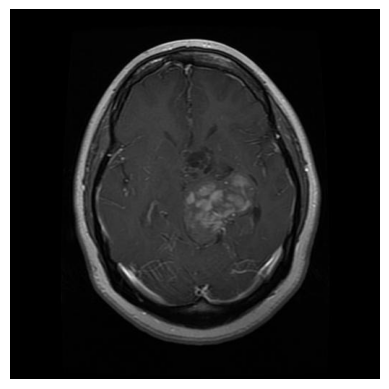

In [4]:
image_path = 'MRI_DATA/Training/glioma_tumor/gg (1).jpg'

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_width, image_height = 150, 150

# Create an ImageDataGenerator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    shear_range=0.2,  # Shear angle in counter-clockwise direction
    zoom_range=0.2,   # Range for random zoom
    horizontal_flip=True,  # Randomly flip inputs horizontally
    validation_split=0.2)  # Here we specify the validation split

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'MRI_DATA/Training/',
        target_size=(image_width, image_height),
        batch_size=32,
        class_mode='categorical',
        subset='training')  # Set as training data

# Flow validation images in batches using train_datagen generator
validation_generator = train_datagen.flow_from_directory(
        'MRI_DATA/Training/',  # point to the same directory as for the training data
        target_size=(image_width, image_height),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Convolutional layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)),
    MaxPooling2D(2, 2),
    
    # Convolutional layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Convolutional layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Convolutional layer 4
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    # Flattening the 3D output to 1D
    Flatten(),
    
    # Dropout to reduce overfitting
    Dropout(0.5),
    
    # Dense layer for prediction
    Dense(512, activation='relu'),
    
    # Output layer with 4 neurons (one for each class) and softmax activation
    Dense(4, activation='softmax')
])

# Printing the model summary to review the architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# training the model

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/20
71/71 [==============================] - 70s 981ms/step - loss: 1.1170 - accuracy: 0.5046 - val_loss: 1.1670 - val_accuracy: 0.4669
Epoch 2/20
71/71 [==============================] - 80s 1s/step - loss: 0.8650 - accuracy: 0.6397 - val_loss: 1.0491 - val_accuracy: 0.4871
Epoch 3/20
71/71 [==============================] - 66s 932ms/step - loss: 0.7368 - accuracy: 0.6958 - val_loss: 0.9266 - val_accuracy: 0.5864
Epoch 4/20
71/71 [==============================] - 65s 915ms/step - loss: 0.5999 - accuracy: 0.7572 - val_loss: 0.9651 - val_accuracy: 0.5735
Epoch 5/20
71/71 [==============================] - 64s 906ms/step - loss: 0.5374 - accuracy: 0.7815 - val_loss: 0.8689 - val_accuracy: 0.6415
Epoch 6/20
71/71 [==============================] - 64s 903ms/step - loss: 0.4897 - accuracy: 0.8040 - val_loss: 0.8372 - val_accuracy: 0.6250
Epoch 7/20
71/71 [==============================] - 67s 949ms/step - loss: 0.4034 - accuracy: 0.8459 - val_loss: 0.9615 - val_accuracy: 0.6415
Ep

In [12]:
# rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# create the test_generator
test_generator = test_datagen.flow_from_directory(
    'MRI_DATA/Testing/',
    target_size=(image_width, image_height),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# evaluate the model on the testing set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)

print(f'Test accuracy: {test_acc*100:.2f}%')


Found 394 images belonging to 4 classes.


6/6 [==============================] - 4s 675ms/step - loss: 4.2216 - accuracy: 0.6484
Test accuracy: 64.84%


# Actual test

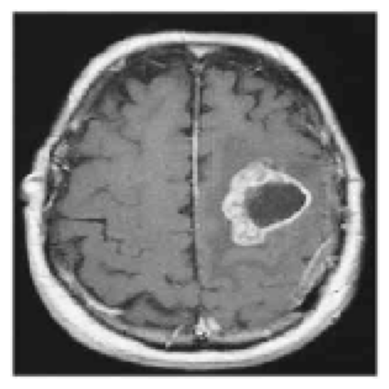

In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your specific image
image_path = 'MRI_DATA/Testing/glioma_tumor/image(29).jpg'

# Load the image and resize it to match the input shape of your model
img = image.load_img(image_path, target_size=(image_width, image_height))

# Display the loaded image
plt.imshow(img)
plt.axis('off')  # Remove axes for clarity
plt.show()

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Rescale the image
img_array /= 255.

# extra dimension for the batch size
img_array = np.expand_dims(img_array, axis=0)

In [27]:
predictions = model.predict(img_array)

# Print
print(predictions)

1/1 [==============================] - 0s 45ms/step
[[6.1809047e-08 3.1348872e-01 6.8651128e-01 1.4797165e-10]]


In [28]:
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {predicted_class}")

Predicted class: [2]


In [29]:
class_names = ['glioma', 'meningioma', 'no', 'pituitary'] 
print(f"Predicted class name: {class_names[predicted_class[0]]}")

Predicted class name: no


In [17]:
print(class_names[predicted_class])

TypeError: only integer scalar arrays can be converted to a scalar index